In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import xgboost 
from sklearn.model_selection import GridSearchCV

df_players = pd.read_csv('top5_leagues_player.csv', index_col = [0])
df_players.head()

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,Ederson,NaN,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.0,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.0,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,NaN,EPL
2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL


In [2]:
pip install xgboost


     ---------------------------------------- 99.8/99.8 MB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
df_players.describe()

,age,height,price,max_price,shirt_nr
count,2612.000000,2601.000000,2602.000000,2606.000000,2612.000000
mean,26.305513,1.830892,10.650711,17.304729,20.495789
std,4.645297,0.067255,15.773271,21.948577,17.914206
min,17.000000,1.630000,0.025000,0.025000,1.000000
25%,23.000000,1.780000,1.800000,3.500000,8.000000
50%,26.000000,1.830000,4.500000,10.000000,17.000000
75%,30.000000,1.880000,13.000000,22.000000,27.000000
max,42.000000,2.060000,180.000000,200.000000,99.000000


In [5]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2612 entries, 0 to 2611
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              2612 non-null   object 
 1   full_name         1480 non-null   object 
 2   age               2612 non-null   int64  
 3   height            2601 non-null   float64
 4   nationality       2612 non-null   object 
 5   place_of_birth    2595 non-null   object 
 6   price             2602 non-null   float64
 7   max_price         2606 non-null   float64
 8   position          2612 non-null   object 
 9   shirt_nr          2612 non-null   int64  
 10  foot              2576 non-null   object 
 11  club              2612 non-null   object 
 12  contract_expires  2544 non-null   object 
 13  joined_club       2612 non-null   object 
 14  player_agent      2353 non-null   object 
 15  outfitter         1003 non-null   object 
 16  league            2612 non-null   object 


In [6]:
# filter columns with empty values
empty_cols = df_players.columns[df_players.isna().any()].tolist()

# create separate df only with columns which consist empty values
df_isnull = df_players[empty_cols]

print(df_isnull.isnull().sum())

full_name           1132
height                11
place_of_birth        17
price                 10
max_price              6
foot                  36
contract_expires      68
player_agent         259
outfitter           1609
dtype: int64


In [7]:
df_players = df_players.dropna(subset=['contract_expires', 'foot', 'height', 'foot', 'price', 'max_price'])
df_players.shape

(2498, 17)

<Axes: >

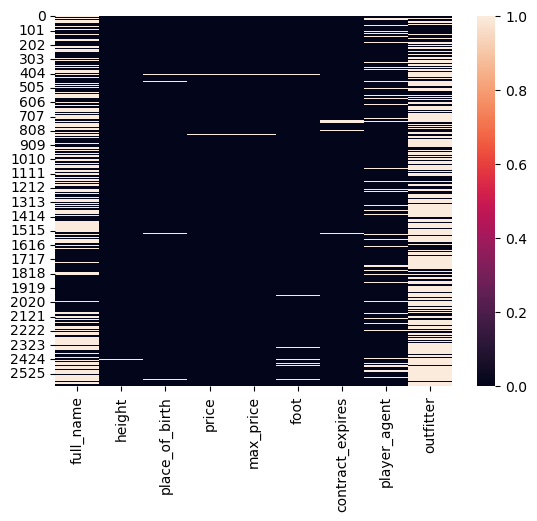

In [8]:
sns.heatmap(df_isnull.isnull())

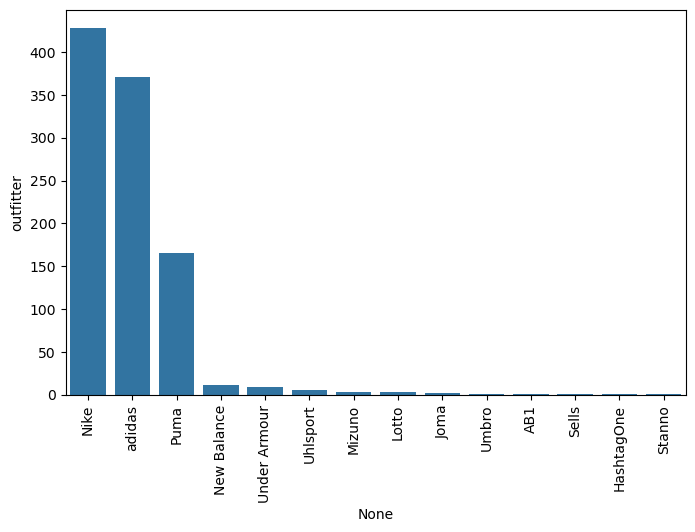

In [11]:
plt.figure(figsize=(8,5))

# Assuming df_isnull['outfitter'] is a column in your DataFrame
outfitter_counts = df_isnull['outfitter'].value_counts()

# Pass indices and values directly to x and y parameters
sns.barplot(x=outfitter_counts.index, y=outfitter_counts)

# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.show()


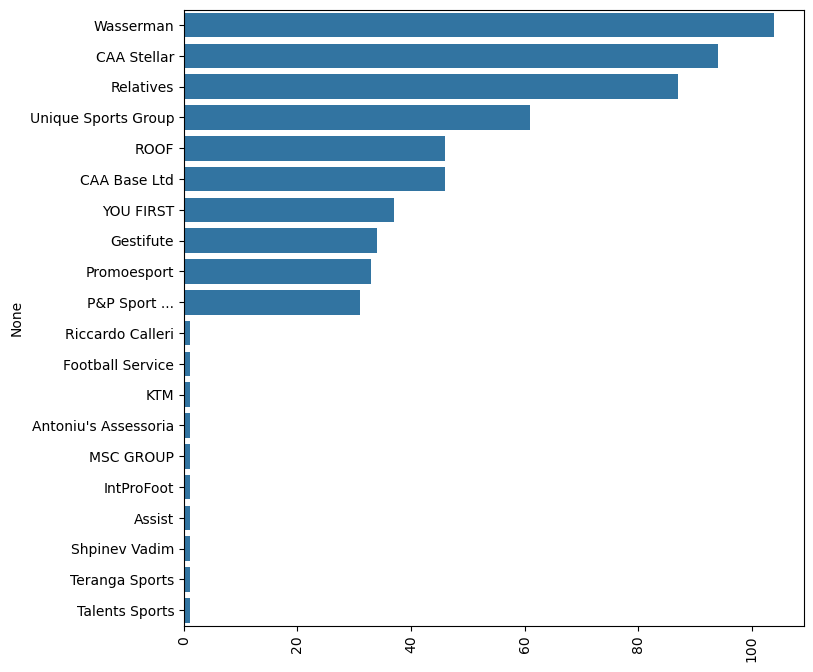

In [13]:
plt.figure(figsize=(8,8))

# Calculate the top 10 and last 10 counts
outfitter_counts = df_isnull['player_agent'].value_counts()
top_10 = outfitter_counts.head(10)
last_10 = outfitter_counts.tail(10)
plot_data = pd.concat([top_10, last_10])

# Plot using seaborn barplot
sns.barplot(x=plot_data.values, y=plot_data.index)

# Rotate the x-axis labels by 90 degrees if needed
plt.xticks(rotation=90)

plt.show()


In [14]:
df_players = df_players.replace(np.nan, 'unknowen')

In [15]:
df_players.head()

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter,league
0,Ederson,unknowen,29,1.88,Brazil Portugal,Osasco (SP),45.00,70.0,Goalkeeper,31,left,Man City,2026-06-30,2017-07-01,Gestifute,Puma,EPL
1,Stefan Ortega,Stefan Ortega Moreno,30,1.85,Germany Spain,Hofgeismar,6.00,6.0,Goalkeeper,18,right,Man City,2025-06-30,2022-07-01,neblung ...,unknowen,EPL
2,Scott Carson,Scott Paul Carson,37,1.88,England,Whitehaven,0.25,6.0,Goalkeeper,33,right,Man City,2023-06-30,2021-07-20,Wasserman,Puma,EPL
3,Rúben Dias,Rúben Santos Gato Alves Dias,26,1.87,Portugal,Amadora,75.00,75.0,Defender - Centre-Back,3,right,Man City,2027-06-30,2020-09-29,Gestifute,Nike,EPL
4,Nathan Aké,Nathan Benjamin Aké,28,1.80,Netherlands Cote d'Ivoire,Den Haag,35.00,40.0,Defender - Centre-Back,6,left,Man City,2025-06-30,2020-08-05,Wasserman,Nike,EPL


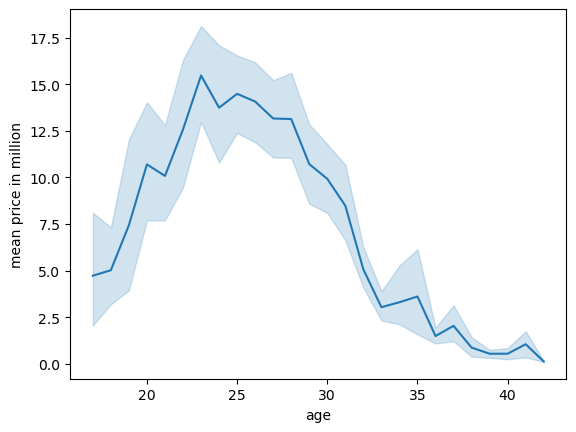

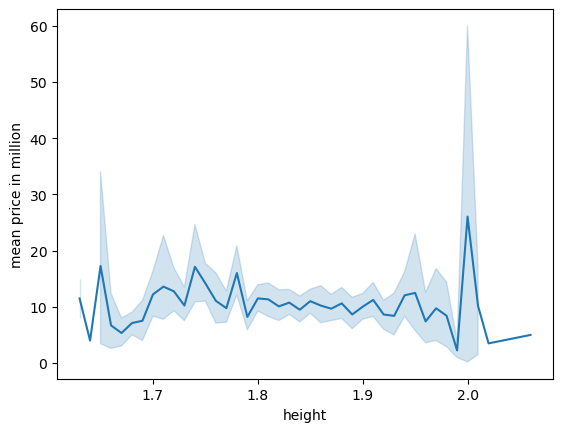

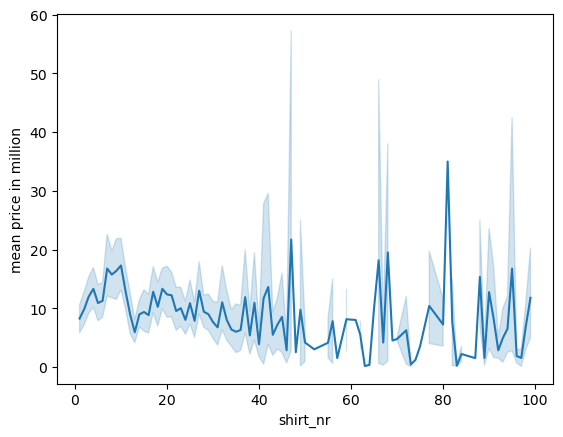

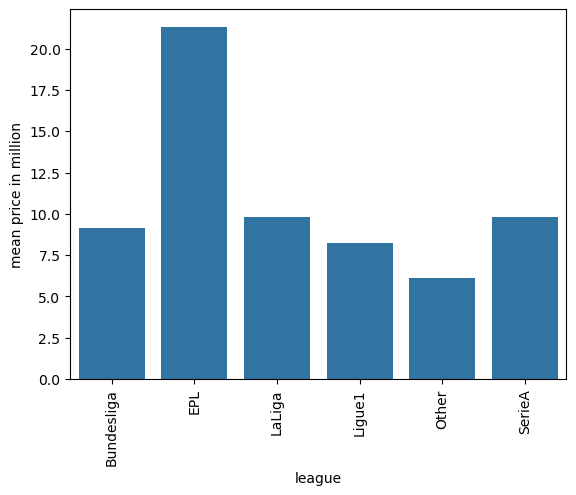

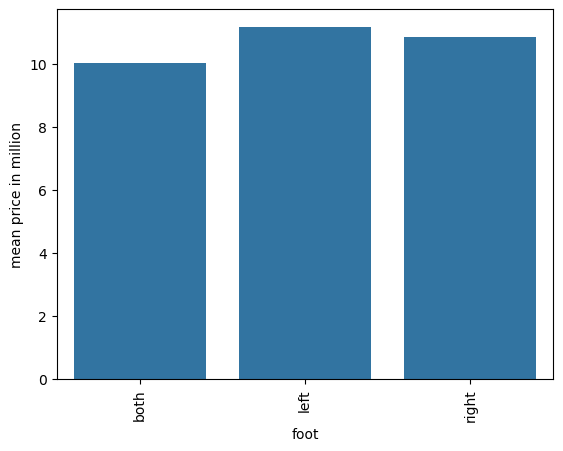

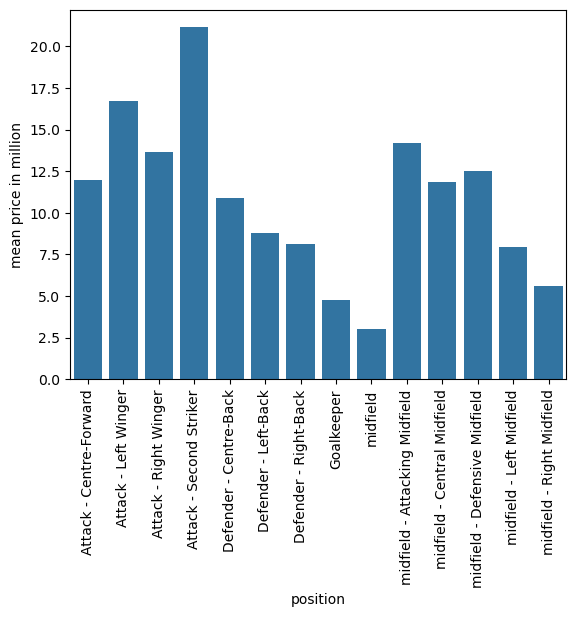

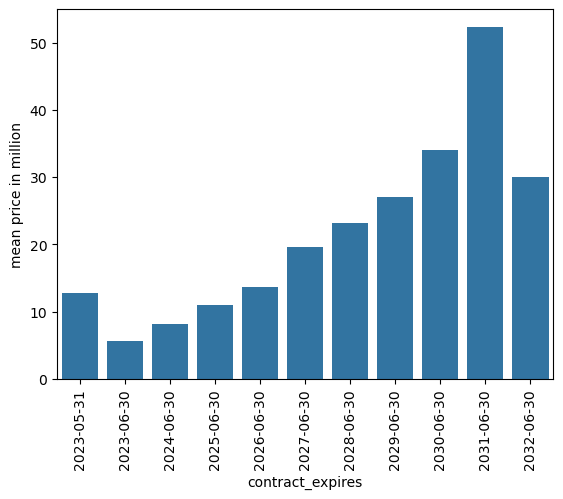

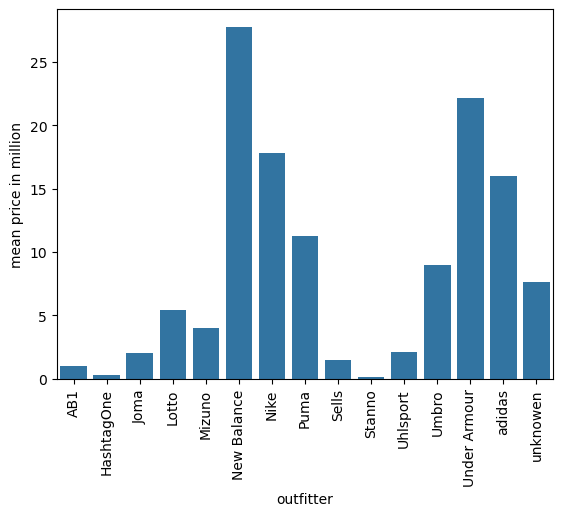

In [16]:
def plotting(df, feature):
    df_mean = df.groupby(feature)['price'].mean().reset_index()
    sns.barplot(data=df_mean, x=feature, y='price')

    # Rotate the x-axis labels by 90 degrees
    ax = plt.gca()
    ax.tick_params(axis='x', labelrotation=90)
    plt.ylabel('mean price in million')
    plt.show()

def plottingLine(df, feature):
    sns.lineplot(data=df, x=feature, y='price')
    plt.ylabel('mean price in million')
    plt.show()
    

feature_list = ['league', 'foot', 'position', 'contract_expires', 'outfitter']

numarical_features = ['age', 'height', 'shirt_nr']

for feature in numarical_features:
    plottingLine(df_players, feature)

for feature in feature_list:
    plotting(df_players, feature)


C:\Users\manik\AppData\Local\Temp\ipykernel_24352\3544387327.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_players.corr(), annot= True, linewidth = 5)


<Axes: >

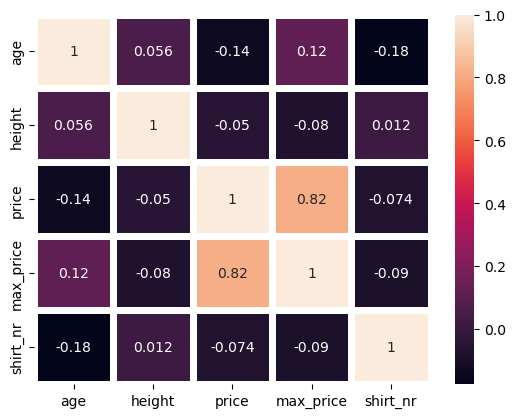

In [17]:
sns.heatmap(df_players.corr(), annot= True, linewidth = 5)

In [18]:
df_target = df_players[['price']]
df_features = df_players[['age', 'height', 'league','foot', 'position', 'club',
                        'contract_expires', 'joined_club', 'player_agent', 'outfitter', 'nationality']]

In [19]:
for column in df_features.columns:
    unique_values = df_features[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'age': [29 30 37 26 28 27 22 32 18 20 31 21 23 19 38 24 33 25 36 35 34 41 39 17
 40 42]
Unique values in column 'height': [1.88 1.85 1.87 1.8  1.89 1.71 1.83 1.69 1.91 1.79 1.77 1.81 1.73 1.82
 1.95 1.7  1.94 1.86 1.93 1.92 1.78 1.9  1.75 1.72 1.74 1.96 1.84 1.97
 2.01 1.98 1.63 1.76 1.67 1.99 1.65 2.   1.68 1.66 2.02 1.64 2.06]
Unique values in column 'league': ['EPL' 'Other' 'Bundesliga' 'SerieA' 'LaLiga' 'Ligue1']
Unique values in column 'foot': ['left' 'right' 'both']
Unique values in column 'position': ['Goalkeeper' 'Defender - Centre-Back' 'Defender - Left-Back'
 'Defender - Right-Back' 'midfield - Defensive Midfield'
 'midfield - Central Midfield' 'midfield - Attacking Midfield'
 'Attack - Left Winger' 'Attack - Right Winger' 'Attack - Centre-Forward'
 'Attack - Second Striker' 'midfield - Left Midfield'
 'midfield - Right Midfield' 'midfield']
Unique values in column 'club': ['Man City' 'Chelsea' 'Chelsea U21' 'Arsenal' 'Liverpool' 'Man Utd'
 'Tottenham'

In [20]:
columns_to_encode = ['league' ,'foot', 'position', 'club', 'contract_expires', 'joined_club', 'player_agent', 'outfitter', 'nationality']

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), columns_to_encode)], remainder='passthrough')

df_features_encoded = ct.fit_transform(df_features)

df_features_encoded.shape

(2498, 1802)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(df_features_encoded, df_target, test_size = 0.3, random_state=22)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

x_train: (1748, 1802)
x_test: (750, 1802)
y_train: (1748,)
y_test: (750,)


In [22]:
param_grid = {'nthread':[4], 
              'objective':['reg:squarederror'],
              'learning_rate': [0.03, 0.05],
              'max_depth': [4, 7],
              'min_child_weight': [2,3,4],
              'subsample': [0.5, 0.3],
              'colsample_bytree': [0.7],
              'n_estimators': [300]}

xgb = xgboost.XGBRegressor(objective= 'reg:linear')

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv = 4)

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print(grid_search.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None, nthread=4,
             num_parallel_tree=None, ...)


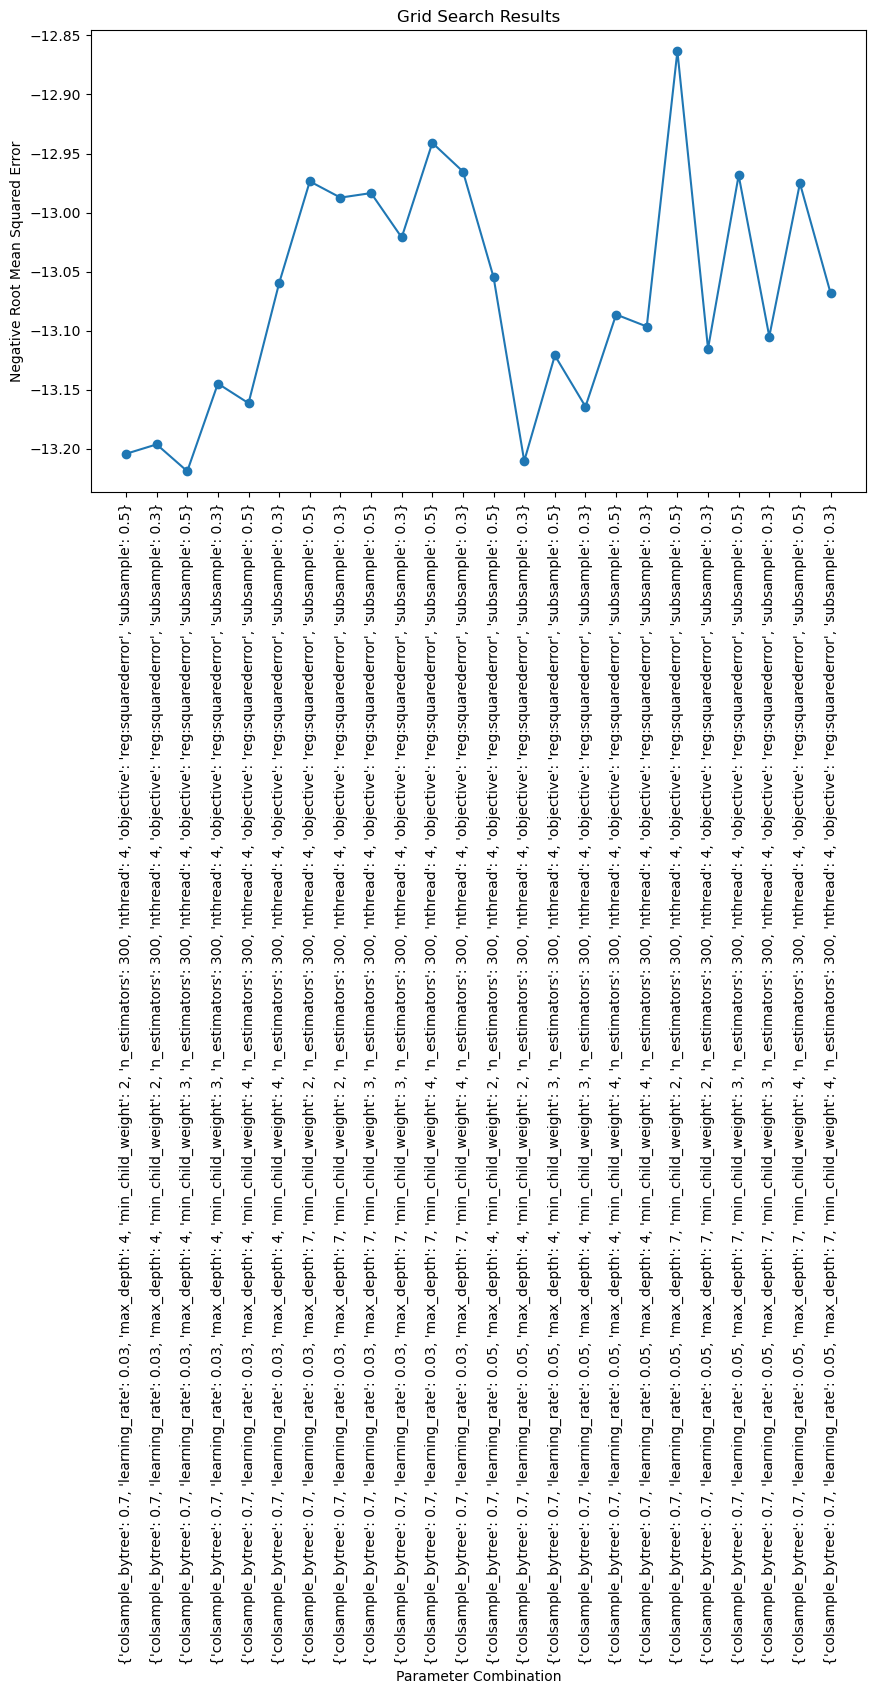

In [23]:
# Access the grid search results
results = grid_search.cv_results_
params = results['params']
mean_scores = results['mean_test_score']

# Visualize the results using a line plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(mean_scores)), mean_scores, marker='o')
plt.xlabel('Parameter Combination')
plt.ylabel('Negative Root Mean Squared Error')
plt.title('Grid Search Results')
plt.xticks(range(len(mean_scores)), params, rotation=90)
plt.show()

In [24]:
best_xgb = xgboost.XGBRegressor( **best_params)

best_xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None, nthread=4,
             num_parallel_tree=None, ...)

In [25]:
pred = best_xgb.predict(x_test)

# evaluation
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('mean absolute error: ',mae)
print('mean squared error: ',mse)
print('root mean squared error: ',rmse)

mean absolute error:  6.8879321190399425
mean squared error:  136.51659827582856
root mean squared error:  11.684031764584883
